In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style="ticks")
from IPython.display import Audio
import numpy as np
import pandas as pd
import scipy
import librosa
import librosa.display
#need to make an explicit seperate import
#import mir_eval

# terminology 
1. sr=sampling rate(Hz)---how many times we sample the audio per second
2. frame =short audio clip (which gives little columes in spectrogram)
3. n_fft=samples per frame
4. hop_length=number of samples between frames
5. defaults: sr=22050 n_fft=2048 hop_length=512
6. terminology refer:
https://community.plm.automation.siemens.com/t5/Testing-Knowledge-Base/Digital-Signal-Processing-Sampling-Rates-Bandwidth-Spectral/ta-p/402991

# Time Domain Terms
one sample length=t
Sampling Rate (Fs) – Number of data samples acquired per second (Fs=1/t)
Frame Size (T) – Amount of time data collected to perform a Fourier transform (T=Nt)
Block Size (N) – Total number of data samples acquired during one frame (N)
# Frequency Domain Terms
Bandwidth (Fmax) – Highest frequency that is captured in the Fourier transform, equal to half the sampling rate (Fmax=Fs/2)
Spectral Lines (SL)– After Fourier transform, total number of frequency domain samples (SL=N/2)
Frequency Resolution (Δf) – Spacing between samples in the frequency domain f=fmax/SL(bandwidth/spectrol lines) 

## To get close to the correct peak amplitude in the time domain, it is important to sample at least 10 times faster than the highest frequency of interest.

In [5]:
y,sr=librosa.load(librosa.util.example_audio_file())
#y is numpy array #sr sampling rate in integer(22050 by default, speak is high, sing can be lower)
Audio(data=y,rate=sr)#gonna display this sound

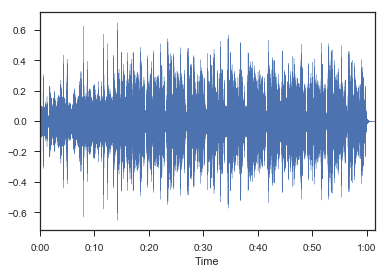

In [11]:
librosa.display.waveplot(y,sr)
#amplitude vs time(wavform) 

In [ ]:
#spectrogram(2D array,frequency vs time)


# harmonics extraction

In [34]:
path2=r"C:\Users\gaoyu\Desktop\music try\Gaussian_Mixture_Models-master\demo.wav"
y,sr = librosa.load(path2, res_type="kaiser_fast")
#y, sr = librosa.load(librosa.util.example_audio_file(),duration=15, offset=30)
# Compute the time-varying tempogram and average over time
tempi = np.mean(librosa.feature.tempogram(y=y, sr=sr), axis=1)
# We'll measure the first five harmonics
h_range = [ 2, 3, 4, 5,6]
f_tempo = librosa.tempo_frequencies(len(tempi), sr=sr)
# Build the harmonic tensor
t_harmonics = librosa.interp_harmonics(tempi, f_tempo, h_range)
print(t_harmonics.shape)

(5, 384)


In [35]:
Audio(data=y,rate=sr)

In [44]:
S = np.abs(librosa.stft(y))
print(S.shape)
fft_freqs = librosa.fft_frequencies(sr=sr)
S_harm = librosa.interp_harmonics(S, fft_freqs, h_range, axis=0)
print(S_harm.shape)
print(S_harm[0].shape)
fft_freqs.ndim

(1025, 216)
(5, 1025, 216)
(1025, 216)


1

In [45]:
fft_freqs

array([0.00000000e+00, 1.07666016e+01, 2.15332031e+01, ...,
       1.10034668e+04, 1.10142334e+04, 1.10250000e+04])

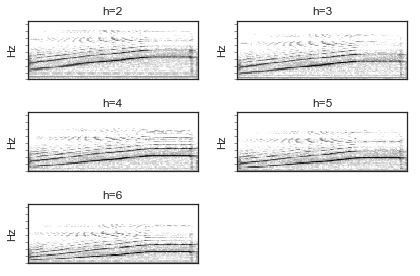

In [40]:
plt.figure()
for i, _sh in enumerate(S_harm, 1):
    plt.subplot(3, 2, i)
    librosa.display.specshow(librosa.amplitude_to_db(_sh,ref=S.max()),sr=sr, y_axis='log',cmap='gray_r')
    plt.title('h={:.3g}'.format(h_range[i-1]))
    plt.yticks([])
plt.tight_layout()

In [38]:
pitches, magnitudes = librosa.piptrack(S=S, sr=sr)


(1025, 216)

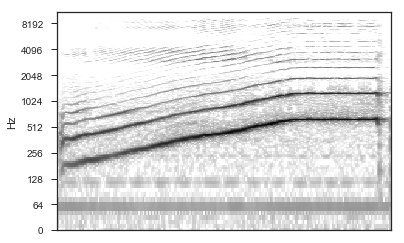

In [55]:
librosa.display.specshow(librosa.amplitude_to_db(S),sr=sr, y_axis='log',cmap='gray_r')

In [58]:
librosa.amplitude_to_db(S,ref=1.0)

array([[-10.903242 , -21.45683  , -27.887848 , ..., -11.247922 ,
        -27.887848 , -10.415339 ],
       [ -8.1350765, -12.893658 , -20.551186 , ..., -13.02374  ,
        -16.128021 , -10.813356 ],
       [ -5.866597 ,  -9.92196  , -25.463074 , ..., -20.894207 ,
        -25.982792 , -10.38726  ],
       ...,
       [-27.887848 , -27.887848 , -27.887848 , ..., -27.887848 ,
        -27.887848 , -27.887848 ],
       [-27.887848 , -27.887848 , -27.887848 , ..., -27.887848 ,
        -27.887848 , -27.887848 ],
       [-27.887848 , -27.887848 , -27.887848 , ..., -27.887848 ,
        -27.887848 , -27.887848 ]], dtype=float32)

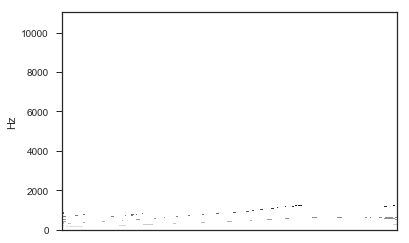

In [59]:
librosa.display.specshow(pitches, y_axis='linear',cmap='gray_r')

In [41]:
y_harmonic = librosa.effects.harmonic(y)
y_harmonic.shape

(110250,)

In [42]:
y_harmonic

array([0.00154254, 0.00184443, 0.00216201, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

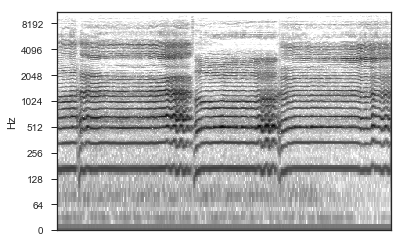

In [60]:
path2=r"C:\Users\gaoyu\Desktop\music try\data_resonance\all_types_F_chain.wav"
y,sr = librosa.load(path2, res_type="kaiser_fast")
S = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(S),sr=sr, y_axis='log',cmap='gray_r')